In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from  matplotlib import pyplot as plt
import seaborn as sns
import missingno as msno
#import plotly.express as px

Vamos a hacer un merge de dos dataframes llamados df_tracks con df_charts. Del segundo nos interesan sobretodo las columnas género artistas y países. Dado que las canciones tienen un ID único haremos el merge por esa columna.Las demás columnas salvo, popularity, que dependerá del momento en el que se extraigan los datos ,  deberían ser iguales dado que son canciones que no varían en sus características. Como fecha utilizamos el año de lanzamiento de la canción.   

In [2]:
df_tracks = pd.read_csv(r"C:\Users\mareg\OneDrive\Escritorio\SPOTIFY CSV\archive (4)\tracks.csv", encoding = "UTF-8",parse_dates=['release_date'])
df_tracks.head()


,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922-01-01,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [3]:
df_tracks.shape

(586672, 20)

In [4]:
df_tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                586672 non-null  object        
 1   name              586601 non-null  object        
 2   popularity        586672 non-null  int64         
 3   duration_ms       586672 non-null  int64         
 4   explicit          586672 non-null  int64         
 5   artists           586672 non-null  object        
 6   id_artists        586672 non-null  object        
 7   release_date      586672 non-null  datetime64[ns]
 8   danceability      586672 non-null  float64       
 9   energy            586672 non-null  float64       
 10  key               586672 non-null  int64         
 11  loudness          586672 non-null  float64       
 12  mode              586672 non-null  int64         
 13  speechiness       586672 non-null  float64       
 14  acou

En el primero hay 71 canciones sin nombre . el resto está completo 

In [5]:
df_tracks.isnull().sum()

id                   0
name                71
popularity           0
duration_ms          0
explicit             0
artists              0
id_artists           0
release_date         0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
dtype: int64

In [6]:
df_charts = pd.read_csv(r"C:\Users\mareg\Downloads\archive (6)\charts.csv", encoding = "UTF-8")
df_charts.head()




,date,country,position,streams,track_id,artists,artist_genres,duration,explicit,name
0,2021/04/15,de,82,625718,20IvMlpi4U5RuDnAlXSRiV,['Haftbefehl'],['german hip hop'],198746,False,Crackküche
1,2019/01/31,jp,171,50896,0V1K6MU0utODk4yNqZKsFv,['Suchmos'],"['japanese r&b', 'j-rock', 'japanese soul', 'j...",408320,False,WATER
2,2018/11/15,tr,59,185439,4qzZm5EIdFurBpDieEmVc9,['Nilipek.'],"['turkish singer-songwriter', 'turkish rock']",257142,False,Gözleri Aşka Gülen
3,2018/11/22,tr,133,111159,4qzZm5EIdFurBpDieEmVc9,['Nilipek.'],"['turkish singer-songwriter', 'turkish rock']",257142,False,Gözleri Aşka Gülen
4,2018/11/29,tr,166,96204,4qzZm5EIdFurBpDieEmVc9,['Nilipek.'],"['turkish singer-songwriter', 'turkish rock']",257142,False,Gözleri Aşka Gülen


Vamos a ver columnas y filas del dataframe 

In [7]:
df_charts.columns

Index(['date', 'country', 'position', 'streams', 'track_id', 'artists',
       'artist_genres', 'duration', 'explicit', 'name'],
      dtype='object')

In [8]:
df_charts.shape

(5428021, 10)

Faltan 885 nombres de canciones. el resto está completo 

In [9]:
df_charts.isnull().sum()

date               0
country            0
position           0
streams            0
track_id           0
artists            0
artist_genres      0
duration           0
explicit           0
name             885
dtype: int64

Para hacer el merge renombramos la columna id_tracks

In [10]:
df_charts = df_charts.rename(columns={'track_id': 'id'})
df_charts.head()


,date,country,position,streams,id,artists,artist_genres,duration,explicit,name
0,2021/04/15,de,82,625718,20IvMlpi4U5RuDnAlXSRiV,['Haftbefehl'],['german hip hop'],198746,False,Crackküche
1,2019/01/31,jp,171,50896,0V1K6MU0utODk4yNqZKsFv,['Suchmos'],"['japanese r&b', 'j-rock', 'japanese soul', 'j...",408320,False,WATER
2,2018/11/15,tr,59,185439,4qzZm5EIdFurBpDieEmVc9,['Nilipek.'],"['turkish singer-songwriter', 'turkish rock']",257142,False,Gözleri Aşka Gülen
3,2018/11/22,tr,133,111159,4qzZm5EIdFurBpDieEmVc9,['Nilipek.'],"['turkish singer-songwriter', 'turkish rock']",257142,False,Gözleri Aşka Gülen
4,2018/11/29,tr,166,96204,4qzZm5EIdFurBpDieEmVc9,['Nilipek.'],"['turkish singer-songwriter', 'turkish rock']",257142,False,Gözleri Aşka Gülen


In [11]:
df_tracks.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922-01-01,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [12]:
#df_charts_grouped = df_charts.groupby("artist")[["country"]].first().reset_index()

Dataframe nuevo que queremos utilizar tras el merge 

In [13]:
df_nuevo_m= df_tracks.merge(df_charts, how='left', on='id')
df_nuevo_m.head()

,id,name_x,popularity,duration_ms,explicit_x,artists_x,id_artists,release_date,danceability,energy,...,time_signature,date,country,position,streams,artists_y,artist_genres,duration,explicit_y,name_y
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,...,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,...,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,...,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922-01-01,0.402,0.1580,...,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Vemos visualmente los Nan a través de una muestra de los datos 


<AxesSubplot:>

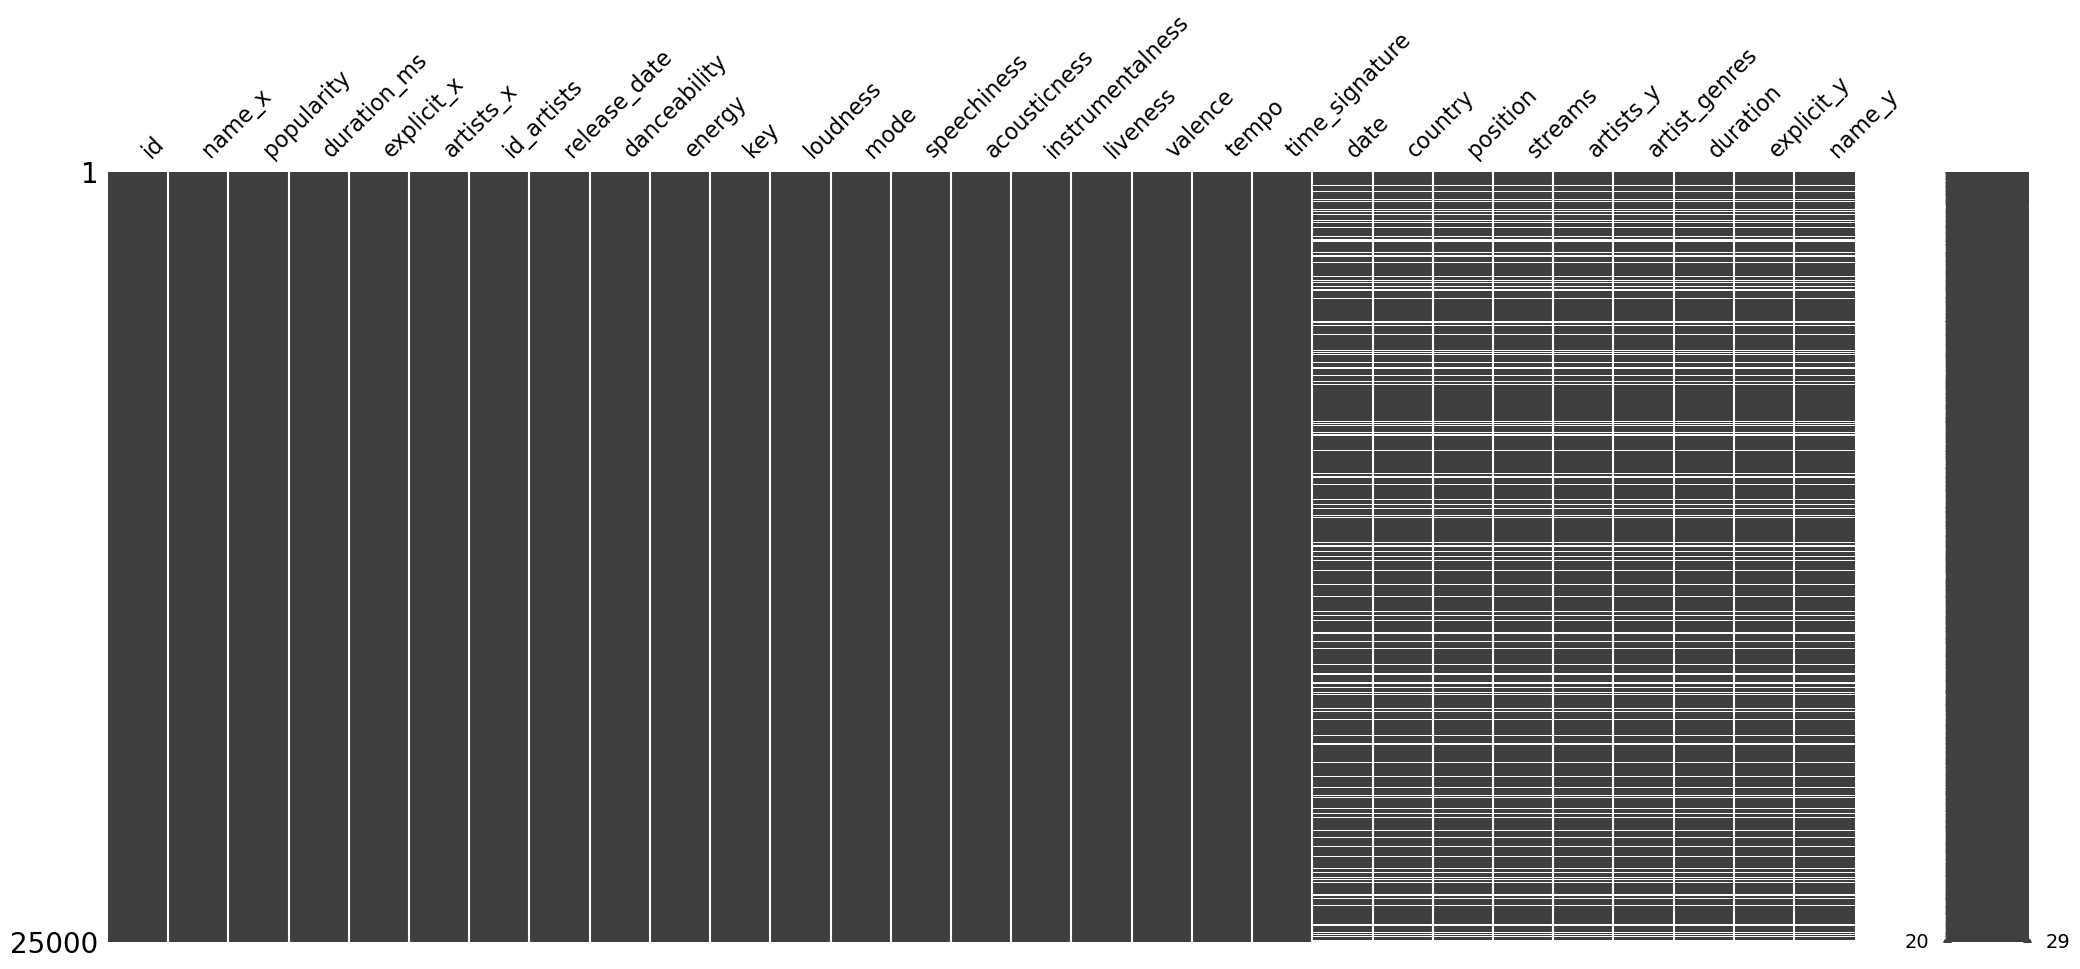

In [14]:
%matplotlib inline
msno.matrix(df_nuevo_m.sample(25000))

In [15]:
df_nuevo_m.shape

(3807634, 29)

In [16]:
print(df_nuevo_m['streams'])

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
            ...   
3807629    47753.0
3807630    46163.0
3807631    43820.0
3807632        NaN
3807633        NaN
Name: streams, Length: 3807634, dtype: float64


In [17]:
df_nuevo_m.columns

Index(['id', 'name_x', 'popularity', 'duration_ms', 'explicit_x', 'artists_x',
       'id_artists', 'release_date', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature', 'date', 'country',
       'position', 'streams', 'artists_y', 'artist_genres', 'duration',
       'explicit_y', 'name_y'],
      dtype='object')

eliminamos duplicadas y aquellas que no nos interesan (por ejemplo position: Posición en el ranking en ese día.)

In [18]:

df_nuevo_m = df_nuevo_m.drop(['artists_y', 'explicit_y',"duration","name_y","date","position","streams"], axis=1)

In [19]:
df_nuevo_m.columns

Index(['id', 'name_x', 'popularity', 'duration_ms', 'explicit_x', 'artists_x',
       'id_artists', 'release_date', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature', 'country',
       'artist_genres'],
      dtype='object')

In [20]:
df_nuevo_m.shape

(3807634, 22)

In [21]:
df_nuevo_m.head()

,id,name_x,popularity,duration_ms,explicit_x,artists_x,id_artists,release_date,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,country,artist_genres
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,...,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3,NaN,NaN
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,...,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1,NaN,NaN
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,...,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5,NaN,NaN
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,...,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3,NaN,NaN
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922-01-01,0.402,0.1580,...,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4,NaN,NaN


In [22]:
df_nuevo_m = df_nuevo_m.dropna(how='all')

In [23]:
df_nuevo_m.shape

(3807634, 22)

In [24]:
df_nuevo_m = df_nuevo_m.dropna(how='any')

In [25]:
df_nuevo_m.shape

(3248254, 22)

In [26]:
df_nuevo_m.isnull().sum()

id                  0
name_x              0
popularity          0
duration_ms         0
explicit_x          0
artists_x           0
id_artists          0
release_date        0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
country             0
artist_genres       0
dtype: int64

<AxesSubplot:>

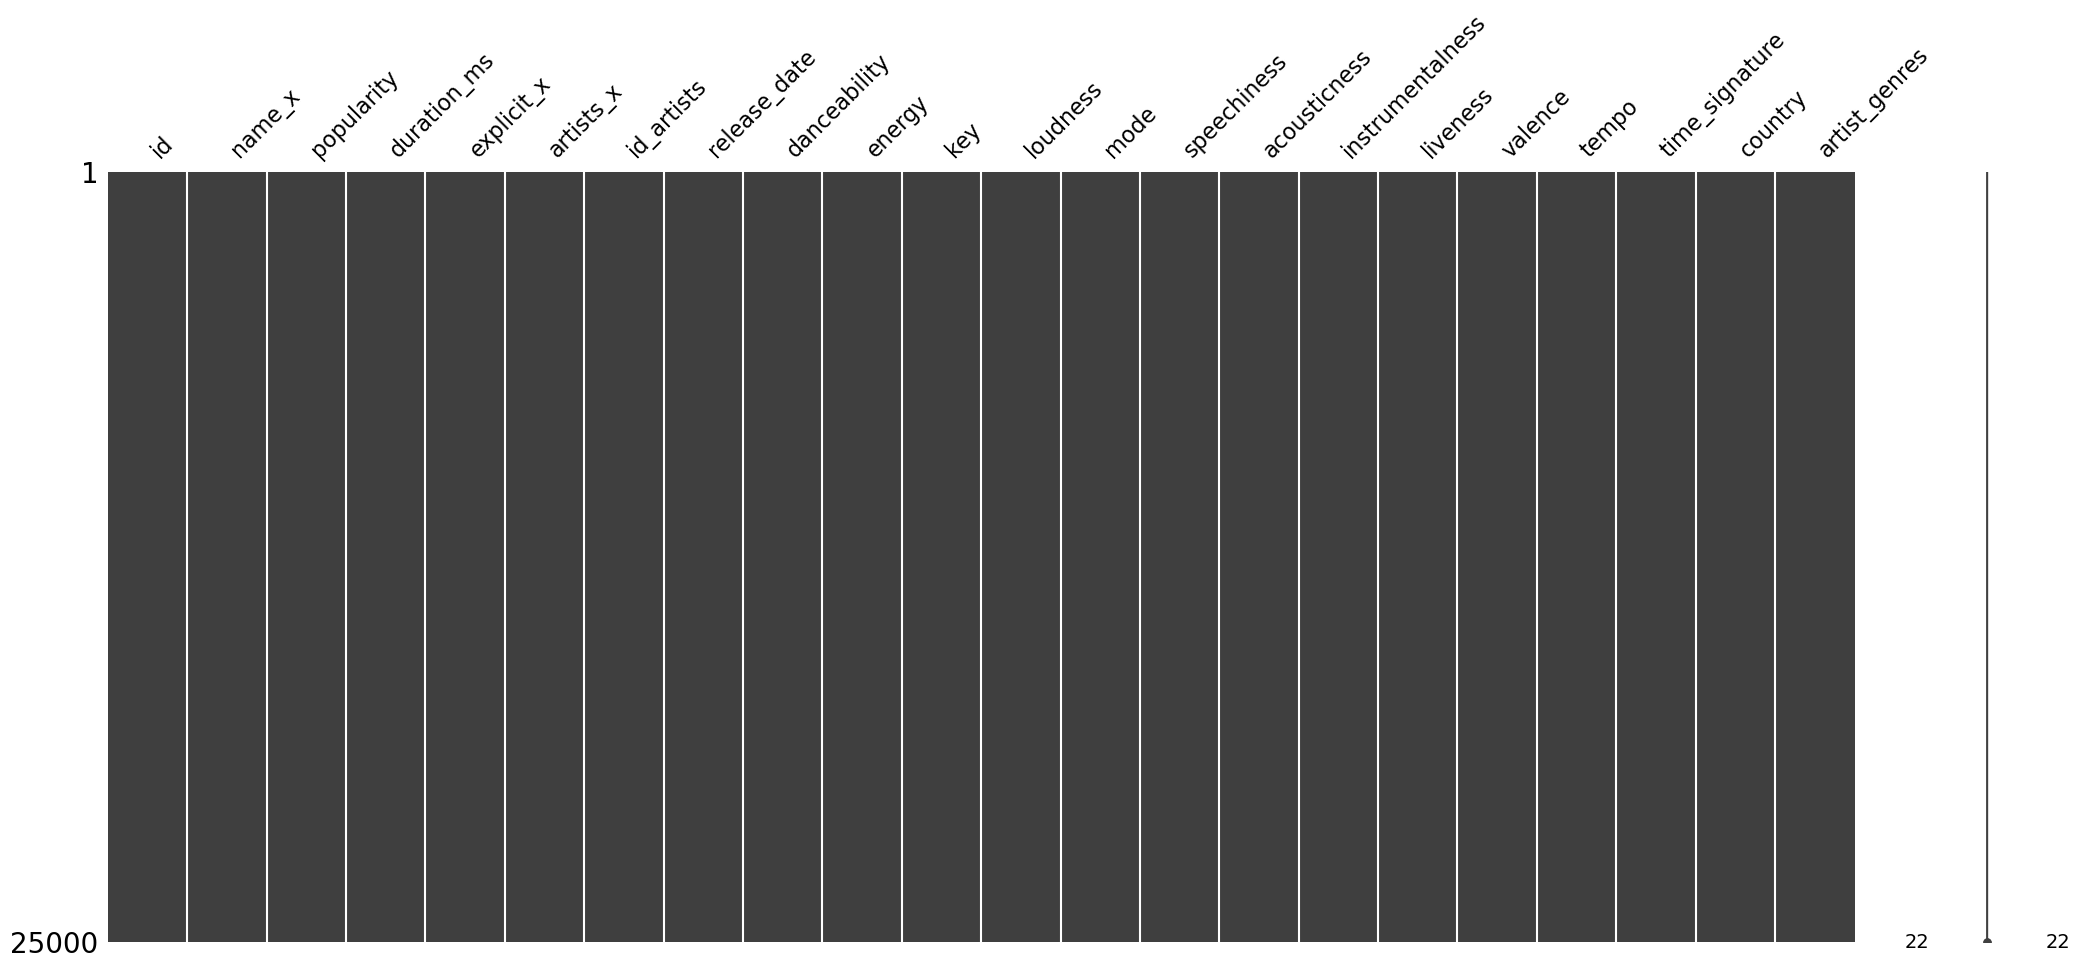

In [27]:
%matplotlib inline
msno.matrix(df_nuevo_m.sample(25000))

In [28]:
df_nuevo_m.shape

(3248254, 22)

In [29]:
print(df_nuevo_m.isna().sum())

id                  0
name_x              0
popularity          0
duration_ms         0
explicit_x          0
artists_x           0
id_artists          0
release_date        0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
country             0
artist_genres       0
dtype: int64


Guardamos el DataFrame en un archivo CSV


In [32]:
df_nuevo_m.to_csv('nuevo_DFSpotify.csv', index=False)